TYPES OF CLASSIFICATION
+ Binary  
+ Multiclass

##### ACCURACY
No of correct predictions/Total no of inputs   
`TP+TN / TP+TN+FP+FN`  

##### CONFUSION MATRIX

|            |Predicted T|Predicted F|
|------------|-----------|-----------|
|**Actual T**|TP         |FN         |
|**Actual F**|FP         |TN         |



+ Accuracy  
`TP+TN / TP+TN+FP+FN`  

+ Precision  
`TP / TP+FP`  
TP divide by total no of predicted positives.  
Of predicted +ve what %age is truly +ve.  
Used to minimize **FP**  
Eg classify non spam as spam.  

+ Recall/TPR/Sensitivity    
`TP / TP+FN`  
TP divide by the real/accurate positives.  
How it correctly identifies positive cases.  
Used to minimize **FN**  
Eg medical, must get all positives even if it will have FP as well.  

+ Specificity/TNR  
`TN / TN+FP`  
TN divide by the real/accurate negatives.  
How it correctly identifies negative cases.  

+ FPR  
`FP / FP+TN`  
FP divide by real/accurate negatives.  
`1 - Specificity/TNR`  

+ F1-Score  
`2*P*R / P+R`  
Harmonic mean of precison and recall.  


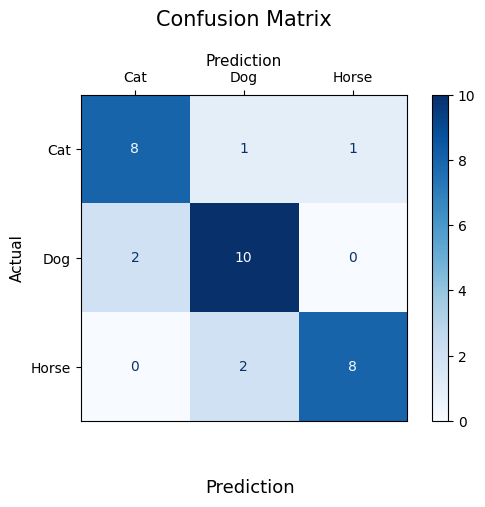

In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Actual labels
y_true = ['Cat'] * 10 + ['Dog'] * 12 + ['Horse'] * 10
# Predicted labels 
y_pred = ['Cat'] * 8 + ['Dog'] + ['Horse'] + ['Cat'] * 2 + ['Dog'] * 10 + ['Horse'] * 8 + ['Dog'] * 2
# Classes
classes = ['Cat', 'Dog', 'Horse']

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15, pad=20)
plt.xlabel('Prediction', fontsize=11)
plt.ylabel('Actual', fontsize=11)
#Customizations
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)

plt.show()


In [7]:
# Print classification report
print(classification_report(y_true, y_pred, target_names=classes))

              precision    recall  f1-score   support

         Cat       0.80      0.80      0.80        10
         Dog       0.77      0.83      0.80        12
       Horse       0.89      0.80      0.84        10

    accuracy                           0.81        32
   macro avg       0.82      0.81      0.81        32
weighted avg       0.82      0.81      0.81        32



##### AUC-ROC CURVE
Area Under the Receiver Operating Characteristic curve.  

**ROC (RECEIVER OPERATING STATISTIC)**  
This is a graph of TPR(RECALL) vs FPR.  
`TPR = TP / TP+FN`  
`FPR = FP / TN+FP`  

**AUC (AREA UNDER CURVE)**  
This is the arrea under the ROC curve.  
Lies between 0 and 1.  

**Sensitivity/recall/tpr vs Specificity/tnr**  
Inveresely proportional.  
If one inc the other dec.  
Low threshold -> High sensitivity/ more tp.  
High threshold -> High soecificity/ more tn/ few fp.  

**fpr vs tpr/recall/sensitivity**  
Directly proportional.  
Inc tpr -> inc fpr  


In [8]:
import numpy as np
from sklearn .metrics import roc_auc_score

y_true = [1, 1, 0, 0, 1, 0]
y_pred = [0.95, 0.90, 0.85, 0.81, 0.78, 0.70]
auc = np.round(roc_auc_score(y_true, y_pred), 3)
print("Auc: {}".format(auc))


Auc: 0.778


##### CROSS-VALIDATION  
This is a technique of dividing the available data into multiple subsets or folds.   
One of the folds is used as test set and the other as training set.  
This is done severally each time using different folds as test set.  
The results of each process from test set are averaged.  
It helps ensure that the model generalizes well to unseen data.  
Thus prevents **overfitting**.  

##### HOLDOUT VALIDATION  
Separate the data into two sets, Training and Test Sets.  
The training set is usally larger than the test set.  

##### STRATIFIED K-FOLD CROSS-VALIDATION
Preferred compared to random sapmling.  
If population has 700 boys and 300 girls;  
In stratified sampling, data is splitted ensuring the proportion of boys is 70% and of girls is 30%.  


In [11]:
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets

cancer = datasets.load_breast_cancer()

x = cancer.data						 
y = cancer.target					 

# Feature Scaling for input features.
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# Create model
lr = linear_model.LogisticRegression()

# Create StratifiedKFold object
# Splits data to 10 folds
# Shuffles data before splitting to ensure folds are randomized
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# A list to store the accuracy for each fold.
lst_accu_stratified = []

# train_index is the training data for a specific fold
for train_index, test_index in skf.split(x, y): 
	x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
	y_train_fold, y_test_fold = y[train_index], y[test_index]
	lr.fit(x_train_fold, y_train_fold)
	lst_accu_stratified.append(lr.score(x_test_fold, y_test_fold))

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy:',
	max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
	min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
	mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation:',
	stdev(lst_accu_stratified))


List of possible accuracy: [0.9298245614035088, 0.9649122807017544, 0.9824561403508771, 1.0, 0.9649122807017544, 0.9649122807017544, 0.9824561403508771, 0.9473684210526315, 0.9473684210526315, 0.9821428571428571]

Maximum Accuracy: 100.0 %

Minimum Accuracy: 92.98245614035088 %

Overall Accuracy: 96.66353383458647 %

Standard Deviation: 0.02097789213195869
